## WEEK 4 tf idf example/ PBA 2025
Sentiment Analysis on IMDB dataset



#### Sentiment Analysis on IMDB dataset using different classifiers such as LinearSVM, LogisticRegression, NaiveBayes, XGBoost, RandomForest with different kind of embeddings such as TF-IDF, USE, and TF-IDF+USE

link IMDB dataset: PBA Gasal 2025
https://drive.google.com/drive/folders/1kDZ25BrcPyNGzyrXApu_MRiY4AM-lRYs?usp=sharing

#### Installing and importing libraries

In [1]:
pip install -U nltk -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow_hub -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install xgboost -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import nltk
import re
import torch
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [7]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))

#### To check is there any GPU available or not

In [10]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")


GPU not available, CPU used


#### Load the IMDB dataset for sentiment analysis between positive and negative reviews

In [11]:
df = pd.read_csv('data/IMDB Dataset.csv')
df = df.sample(frac=1).reset_index(drop=True)
df

,review,sentiment
0,"Well, what can I say having just watched this ...",positive
1,'Leatherheads' tries so hard. Tries to be ligh...,negative
2,I have to say I quite enjoyed Soldier. Russell...,positive
3,"Written by someone who has been there, you can...",positive
4,Fun With Dick and Jane failed to entertain on ...,negative
...,...,...
49995,The horror of this made for TV film was that i...,negative
49996,"Herbie, the Volkswagen that thinks like a man,...",negative
49997,This HAS to be the worst movie I've ever attem...,negative
49998,Notorious for more than a quarter century (and...,negative


#### Exploratory Data Analysis for IMDB dataset

In [12]:
class EDA():
    def get_length_dist(self,data):
        rev_len = [len(i) for i in data]
        pd.Series(rev_len).hist()
        plt.title('Number of types of commets')
        plt.xlabel('length')
        plt.ylabel('number')
        plt.show()
        print(pd.Series(rev_len).describe())
    def get_class_dist(self,df):
        df['sentiment'].replace({1:'positive',0:'negative'}).value_counts().plot(kind='bar',figsize=(7,4))
        plt.title('Number of types')
        plt.xlabel('Comment_type')
        plt.ylabel('number')
        plt.show()


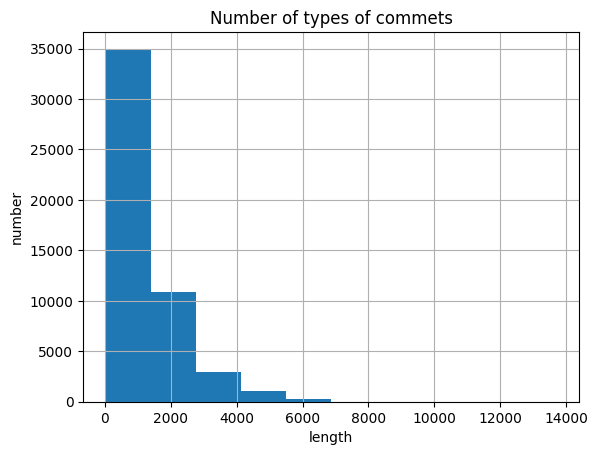

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
dtype: float64


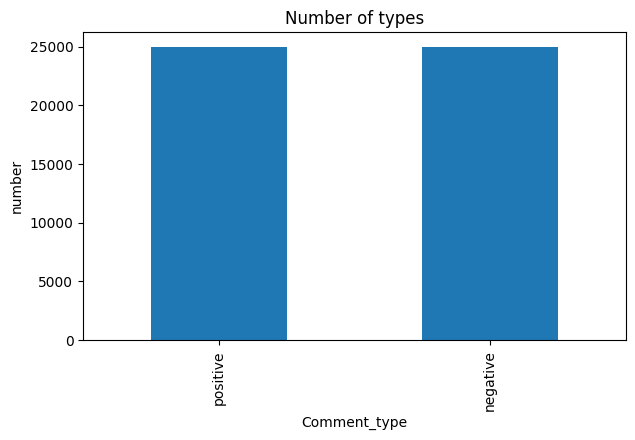

In [13]:
eda = EDA()
eda.get_length_dist(df['review'])
eda.get_class_dist(df)

#### Preprocess the data

In [14]:
def preprocess_text(text):
    # Remove HTML tags and strip whitespace
    text = re.sub(r'<[^>]*>', '', text)
    text = text.strip()
    # Remove noisy characters and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    # Lowercase text
    text = text.lower()
    # Tokenize text and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)


In [15]:
df['review'] = df['review'].apply(preprocess_text)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\VICTUS/nltk_data'
    - 'c:\\Users\\VICTUS\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\VICTUS\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\VICTUS\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\VICTUS\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [16]:
df['review'].head(20)

0     Well, what can I say having just watched this ...
1     'Leatherheads' tries so hard. Tries to be ligh...
2     I have to say I quite enjoyed Soldier. Russell...
3     Written by someone who has been there, you can...
4     Fun With Dick and Jane failed to entertain on ...
5     His music, especially what we hear of it here,...
6     Going into seeing this movie I was a bit skept...
7     Breathtaking at it's best, intriguing at it's ...
8     I am not an artistically inclined individual. ...
9     I'm not a writer or an critic...I'M just a stu...
10    I adored this movie. Not only because I am a b...
11    Yes, The Southern Star features a pretty forge...
12    Ben Masters,(Kyd Thomas),"Dream Lover",'86 pla...
13    This review contains some small, yet significa...
14    "Holly" is an issue-driven film, but it is nei...
15    Akin's prize-winning 2004 movie Head-On/Gegen ...
16    THE GOLDEN DOOR (NUOVOMONDO) is for this viewe...
17    A typical Lanza flick that had limited aud

#### Split x=feature, y=target

In [17]:
x = df['review']
y = df['sentiment']

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
Y = label_encode.fit_transform(df['sentiment'])
Y

array([1, 0, 1, ..., 0, 0, 0], shape=(50000,))

In [19]:
y

0        positive
1        negative
2        positive
3        positive
4        negative
           ...   
49995    negative
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

### Note: 0 represent negative comments and 1 represent positive comments

### Split the dataset into training and testing sets


In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x, Y, test_size=0.2, random_state=42)

### Create a vocabulary

In [21]:
# Create a vocabulary
from collections import Counter
word_counts = Counter(' '.join(xtrain).split())

### Display each word in the vocabulary along with its count


In [ ]:
#for word, count in word_counts.items():
    #print(f"{word}: {count}")

In [ ]:
#vocab = [word for word, count in word_counts.most_common()]
#vocab

### Classification with various classifiers
#### 1. Linear SVM
#### 2. Logistic Regression (LR)
#### 3. Naive Bayes
#### 4. XGBoost
#### 5. Random Forest

In [22]:
#Import libraries
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from timeit import default_timer as timer

#### Initialize classifiers

In [23]:
svm_classifier = LinearSVC()
logistic_regression = LogisticRegression(max_iter=1000)
nb_classifier = MultinomialNB()
xgboost_classifier = XGBClassifier()
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='sqrt', min_samples_leaf=4, bootstrap=True, n_jobs=-1, random_state=0)

In [24]:
def evaluate_model(model, xtest, ytest):
    # Make predictions using the model
    y_pred = model.predict(xtest)

    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    # Calculate precision
    precision = precision_score(ytest, y_pred)
    # Calculate recall
    recall = recall_score(ytest, y_pred)
    # Calculate f1 score
    f1 = f1_score(ytest, y_pred)
    # Generate a classification report and confusion matrix
    report = classification_report(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return y_pred, accuracy, precision, recall, f1, report, cm


In [25]:
# Define batch size
batch_size = 1000

## 1. TF-IDF

#### TF-IDF Vectorization


In [26]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

##### Process the data in smaller batches for training data


In [27]:
start = timer()
tfidf_vectorizer_xtrain = []
for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_tfidf = tfidf_vectorizer.fit_transform(batch_X_train)
    tfidf_vectorizer_xtrain.extend(batch_X_train_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer() - start)

Required time for embedding TFIDF with train data:-  14.543095899978653


##### Repeat the same process for test data


In [28]:
start = timer()
tfidf_vectorizer_xtest = []
for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_tfidf = tfidf_vectorizer.transform(batch_X_test)
    tfidf_vectorizer_xtest.extend(batch_X_test_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer() - start)

Required time for embedding TFIDF with train data:-  3.643869600025937


#### Fit classifiers

In [29]:
start = timer()
svm_tfidf = svm_classifier.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training Linear SVM classifiers:- ', timer() - start)
start = timer()
lr_tfidf = logistic_regression.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training Logistic Regression classifiers:- ', timer() - start)
start = timer()
nb_tfidf = nb_classifier.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training Naive Bayes classifiers:- ', timer() - start)
start = timer()
xgboost_tfidf = xgboost_classifier.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training XGBoost classifiers:- ', timer() - start)
start = timer()
rfc_tfidf = random_forest_classifier.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training all five classifiers:- ', timer() - start)

Required time for training Linear SVM classifiers:-  4.591800299996976
Required time for training Logistic Regression classifiers:-  5.124840100004803
Required time for training Naive Bayes classifiers:-  3.2818804000271484
Required time for training XGBoost classifiers:-  80.2925852999906
Required time for training all five classifiers:-  5.424051399983


#### Make predictions

### Linear SVM

In [30]:
start = timer()
y_pred_svm, accuracy_svm, precision_svm, recall_svm, f1_svm, report_svm, confusion_matrix_svm = evaluate_model(svm_tfidf, tfidf_vectorizer_xtest, ytest)
print('Required time for SVM prediction:- ', timer() - start)

Required time for SVM prediction:-  1.2358085000305437


#### Print actual vs. predicted results for LinearSVM

In [31]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_svm[:15]):
    print(f"Actual: {actual}, SVM Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, SVM Predicted: 0

Actual: 1, SVM Predicted: 1

Actual: 1, SVM Predicted: 1

Actual: 1, SVM Predicted: 1

Actual: 0, SVM Predicted: 0

Actual: 1, SVM Predicted: 1

Actual: 1, SVM Predicted: 1

Actual: 1, SVM Predicted: 0

Actual: 0, SVM Predicted: 0

Actual: 0, SVM Predicted: 0

Actual: 0, SVM Predicted: 0

Actual: 0, SVM Predicted: 0

Actual: 0, SVM Predicted: 0

Actual: 1, SVM Predicted: 1

Actual: 0, SVM Predicted: 0



In [32]:
print(f"LinearSVM Accuracy: {accuracy_svm:.2f}")
print(f"LinearSVM Precision: {precision_svm:.2f}")
print(f"LinearSVM Recall: {recall_svm:.2f}")
print(f"LinearSVM F1 score: {f1_svm:.2f}")
print("Classification Report:")
print(report_svm)
print("Confusion Matrix")
print(confusion_matrix_svm)

LinearSVM Accuracy: 0.71
LinearSVM Precision: 0.70
LinearSVM Recall: 0.71
LinearSVM F1 score: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70      5013
           1       0.70      0.71      0.71      4987

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

Confusion Matrix
[[3503 1510]
 [1434 3553]]


### Logistic Regression

In [33]:
start = timer()
y_pred_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, report_lr, cm_lr = evaluate_model(lr_tfidf, tfidf_vectorizer_xtest, ytest)
print('Required time for Logistic Regression prediction:- ', timer() - start)

Required time for Logistic Regression prediction:-  0.30064640002092347


#### Print actual vs. predicted results for Logistic Regression


In [34]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_lr[:15]):
    print(f"Actual: {actual}, Logistic Regression Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 1

Actual: 0, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 1

Actual: 0, Logistic Regression Predicted: 0



In [35]:
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Recall: {recall_lr:.2f}")
print(f"Logistic Regression F1 score: {f1_lr:.2f}")
print("Classification Report:")
print(report_lr)
print("Confusion Matrix")
print(cm_lr)

Logistic Regression Accuracy: 0.71
Logistic Regression Precision: 0.71
Logistic Regression Recall: 0.72
Logistic Regression F1 score: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      5013
           1       0.71      0.72      0.71      4987

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

Confusion Matrix
[[3553 1460]
 [1401 3586]]


### Naive bayes

In [36]:
start = timer()
y_pred_nb, accuracy_nb, precision_nb, recall_nb, f1_nb, report_nb, cm_nb = evaluate_model(nb_tfidf, tfidf_vectorizer_xtest, ytest)
print('Required time for Naive Bayes prediction:- ', timer() - start)

Required time for Naive Bayes prediction:-  0.3171064999769442


#### Print actual vs. predicted results for Naive bayes


In [37]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_nb[:15]):
    print(f"Actual: {actual}, Naive bayes Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, Naive bayes Predicted: 0

Actual: 1, Naive bayes Predicted: 1

Actual: 1, Naive bayes Predicted: 1

Actual: 1, Naive bayes Predicted: 1

Actual: 0, Naive bayes Predicted: 0

Actual: 1, Naive bayes Predicted: 1

Actual: 1, Naive bayes Predicted: 1

Actual: 1, Naive bayes Predicted: 0

Actual: 0, Naive bayes Predicted: 0

Actual: 0, Naive bayes Predicted: 0

Actual: 0, Naive bayes Predicted: 0

Actual: 0, Naive bayes Predicted: 0

Actual: 0, Naive bayes Predicted: 0

Actual: 1, Naive bayes Predicted: 1

Actual: 0, Naive bayes Predicted: 0



In [38]:
print(f"Naive bayes Accuracy: {accuracy_nb:.2f}")
print(f"Naive bayes Precision: {precision_nb:.2f}")
print(f"Naive bayes Recall: {recall_nb:.2f}")
print(f"Naive bayes F1 score: {f1_nb:.2f}")
print("Classification Report:")
print(report_nb)
print("Confusion Matrix:")
print(cm_nb)

Naive bayes Accuracy: 0.71
Naive bayes Precision: 0.71
Naive bayes Recall: 0.71
Naive bayes F1 score: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      5013
           1       0.71      0.71      0.71      4987

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

Confusion Matrix:
[[3567 1446]
 [1441 3546]]


### XGBoost Classifier

In [39]:
start = timer()
y_pred_xgboost, accuracy_xgboost, precision_xgboost, recall_xgboost, f1_xgboost, report_xgboost, cm_xgboost = evaluate_model(xgboost_tfidf, tfidf_vectorizer_xtest, ytest)
print('Required time for XGBoost classifier prediction:- ', timer() - start)

Required time for XGBoost classifier prediction:-  0.435661000024993


#### Print actual vs. predicted results for XGBoost classifier


In [40]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_xgboost[:15]):
    print(f"Actual: {actual}, XGBoost Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, XGBoost Predicted: 1

Actual: 1, XGBoost Predicted: 1

Actual: 1, XGBoost Predicted: 1

Actual: 1, XGBoost Predicted: 1

Actual: 0, XGBoost Predicted: 1

Actual: 1, XGBoost Predicted: 1

Actual: 1, XGBoost Predicted: 0

Actual: 1, XGBoost Predicted: 0

Actual: 0, XGBoost Predicted: 0

Actual: 0, XGBoost Predicted: 1

Actual: 0, XGBoost Predicted: 0

Actual: 0, XGBoost Predicted: 1

Actual: 0, XGBoost Predicted: 0

Actual: 1, XGBoost Predicted: 1

Actual: 0, XGBoost Predicted: 1



In [41]:
print(f"XGBoost Accuracy: {accuracy_xgboost:.2f}")
print(f"XGBoost Precision: {precision_xgboost:.2f}")
print(f"XGBoost Recall: {recall_xgboost:.2f}")
print(f"XGBoost F1 score: {f1_xgboost:.2f}")
print("Classification Report:")
print(report_xgboost)
print("Confusion Matrix:")
print(cm_xgboost)

XGBoost Accuracy: 0.70
XGBoost Precision: 0.69
XGBoost Recall: 0.72
XGBoost F1 score: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      5013
           1       0.69      0.72      0.71      4987

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

Confusion Matrix:
[[3382 1631]
 [1376 3611]]


### Random Forest Classifier

In [42]:
start = timer()
y_pred_rfc, accuracy_rfc, precision_rfc, recall_rfc, f1_rfc, report_rfc, cm_rfc = evaluate_model(rfc_tfidf, tfidf_vectorizer_xtest, ytest)
print('Required time for Random Forest classifier prediction:- ', timer() - start)

Required time for Random Forest classifier prediction:-  0.2694566000136547


#### Print actual vs. predicted results for Random Forest classifier

In [43]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_rfc[:15]):
    print(f"Actual: {actual}, Random Forest Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, Random Forest Predicted: 0

Actual: 1, Random Forest Predicted: 1

Actual: 1, Random Forest Predicted: 1

Actual: 1, Random Forest Predicted: 1

Actual: 0, Random Forest Predicted: 1

Actual: 1, Random Forest Predicted: 1

Actual: 1, Random Forest Predicted: 1

Actual: 1, Random Forest Predicted: 1

Actual: 0, Random Forest Predicted: 0

Actual: 0, Random Forest Predicted: 0

Actual: 0, Random Forest Predicted: 0

Actual: 0, Random Forest Predicted: 1

Actual: 0, Random Forest Predicted: 0

Actual: 1, Random Forest Predicted: 1

Actual: 0, Random Forest Predicted: 1



In [44]:
print(f"Random Forest Accuracy: {accuracy_rfc:.2f}")
print(f"Random Forest Precision: {precision_rfc:.2f}")
print(f"Random Forest Recall: {recall_rfc:.2f}")
print(f"Random Forest F1 score: {f1_rfc:.2f}")
print("Classification Report:")
print(report_rfc)
print("Confusion Matrix:")
print(cm_rfc)

Random Forest Accuracy: 0.65
Random Forest Precision: 0.62
Random Forest Recall: 0.80
Random Forest F1 score: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59      5013
           1       0.62      0.80      0.70      4987

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.64     10000
weighted avg       0.67      0.65      0.64     10000

Confusion Matrix:
[[2517 2496]
 [ 991 3996]]


#### Display all five models accuracy

In [45]:
model_names = ['LinearSVM', 'LogisticRegression', 'NaiveBayes', 'XGBoost', 'RandomForest']
model_accuracies = [accuracy_svm, accuracy_lr, accuracy_nb, accuracy_xgboost, accuracy_rfc]

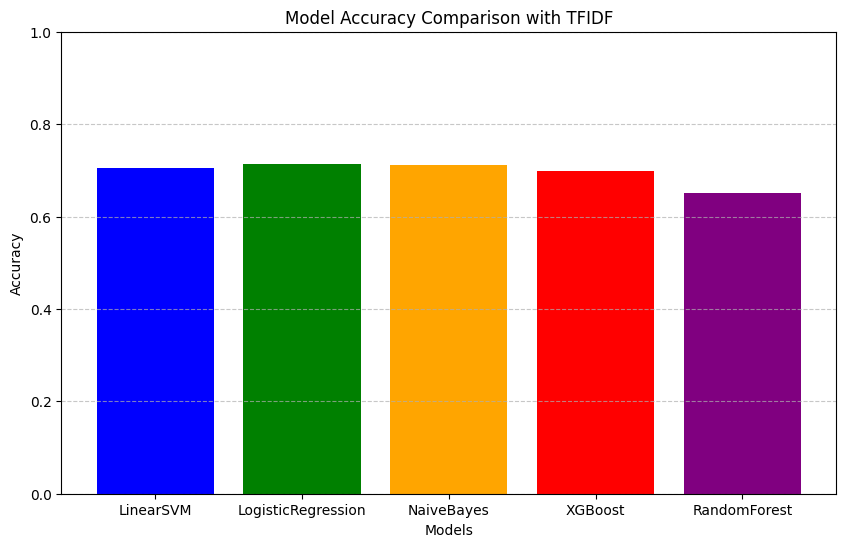

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison with TFIDF")
plt.ylim(0.0, 1.0)  # Set the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 2. Universal Sentence Encoder (USE)
#### 1. Linear SVM
#### 2. Logistic Regression
#### 3. XGBoost classifier
#### 4. Random Forest classifier

#### Load the Universal Sentence Encoder model, and embed this model

In [47]:
start = timer()
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
print('Required time for upload USE from tensorflow hub:- ', timer() - start)

Required time for upload USE from tensorflow hub:-  516.0854055999662


In [48]:
xtrain_use = []
xtest_use = []

In [49]:
start = timer()
for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_use = np.array(embed(batch_X_train))
    xtrain_use.extend(batch_X_train_use)
print('Required time for embedding xtrain with USE:- ', timer() - start)

Required time for embedding xtrain with USE:-  57.980615700013004


In [50]:
start = timer()
for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_use = np.array(embed(batch_X_test))
    xtest_use.extend(batch_X_test_use)
print('Required time for embedding xtest with USE:- ', timer() - start)

Required time for embedding xtest with USE:-  11.489980600017589


#### Fit classifiers

In [51]:
start = timer()
svm_use = svm_classifier.fit(xtrain_use, ytrain)
print('Required time for training Linear SVM classifier:- ', timer() - start)
start = timer()
lr_use = logistic_regression.fit(xtrain_use, ytrain)
print('Required time for training Logistic Regression:- ', timer() - start)
start = timer()
xgboost_use = xgboost_classifier.fit(xtrain_use, ytrain)
print('Required time for training XGBoost classifier:- ', timer() - start)
start = timer()
rfc_use = random_forest_classifier.fit(xtrain_use, ytrain)
print('Required time for training all Random Forest classifier:- ', timer() - start)

Required time for training Linear SVM classifier:-  10.88976280001225
Required time for training Logistic Regression:-  0.8081052000052296
Required time for training XGBoost classifier:-  11.576289499993436
Required time for training all Random Forest classifier:-  4.53413859999273


#### Make predictions

### Linear SVM

In [52]:
start = timer()
y_pred_svm_use, accuracy_svm_use, precision_svm_use, recall_svm_use, f1_svm_use, report_svm_use, cm_svm_use = evaluate_model(svm_use, xtest_use, ytest)
print('Required time for Linear SVM prediction with USE :- ', timer() - start)

Required time for Linear SVM prediction with USE :-  0.07976619998225942


#### Print actual vs. predicted results for LinearSVM with USE

In [53]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_svm_use[:15]):
    print(f"Actual: {actual}, SVM with USE embedding Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, SVM with USE embedding Predicted: 0

Actual: 1, SVM with USE embedding Predicted: 1

Actual: 1, SVM with USE embedding Predicted: 1

Actual: 1, SVM with USE embedding Predicted: 1

Actual: 0, SVM with USE embedding Predicted: 0

Actual: 1, SVM with USE embedding Predicted: 0

Actual: 1, SVM with USE embedding Predicted: 1

Actual: 1, SVM with USE embedding Predicted: 1

Actual: 0, SVM with USE embedding Predicted: 0

Actual: 0, SVM with USE embedding Predicted: 0

Actual: 0, SVM with USE embedding Predicted: 0

Actual: 0, SVM with USE embedding Predicted: 1

Actual: 0, SVM with USE embedding Predicted: 0

Actual: 1, SVM with USE embedding Predicted: 1

Actual: 0, SVM with USE embedding Predicted: 0



In [54]:
print(f"LinearSVM (USE) Accuracy: {accuracy_svm_use:.2f}")
print(f"LinearSVM (USE) Precision: {precision_svm_use:.2f}")
print(f"LinearSVM (USE) Recall: {recall_svm_use:.2f}")
print(f"LinearSVM (USE) F1 score: {f1_svm_use:.2f}")
print("Classification Report:")
print(report_svm_use)
print("Confusion Matrix")
print(cm_svm_use)

LinearSVM (USE) Accuracy: 0.86
LinearSVM (USE) Precision: 0.86
LinearSVM (USE) Recall: 0.86
LinearSVM (USE) F1 score: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5013
           1       0.86      0.86      0.86      4987

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Confusion Matrix
[[4338  675]
 [ 723 4264]]


### Logitic Regression

In [55]:
start = timer()
y_pred_lr_use, accuracy_lr_use, precision_lr_use, recall_lr_use, f1_lr_use, report_lr_use, cm_lr_use = evaluate_model(lr_use, xtest_use, ytest)
print('Required time for LR prediction with USE :- ', timer() - start)

Required time for LR prediction with USE :-  0.045669399958569556


#### Print actual vs. predicted results for Logistic Regression with USE

In [56]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_lr_use[:15]):
    print(f"Actual: {actual}, Logistic Regression Predicted with USE: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, Logistic Regression Predicted with USE: 0

Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 0, Logistic Regression Predicted with USE: 0

Actual: 1, Logistic Regression Predicted with USE: 0

Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 0, Logistic Regression Predicted with USE: 0

Actual: 0, Logistic Regression Predicted with USE: 0

Actual: 0, Logistic Regression Predicted with USE: 0

Actual: 0, Logistic Regression Predicted with USE: 1

Actual: 0, Logistic Regression Predicted with USE: 0

Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 0, Logistic Regression Predicted with USE: 0



In [57]:
print(f"Logistic Regression (USE) Accuracy: {accuracy_lr_use:.2f}")
print(f"Logistic Regression (USE) Precision: {precision_lr_use:.2f}")
print(f"Logistic Regression (USE) Recall: {recall_lr_use:.2f}")
print(f"Logistic Regression (USE) F1 score: {f1_lr_use:.2f}")
print("Classification Report:")
print(report_lr_use)
print("Confusion Matrix")
print(cm_lr_use)

Logistic Regression (USE) Accuracy: 0.86
Logistic Regression (USE) Precision: 0.86
Logistic Regression (USE) Recall: 0.85
Logistic Regression (USE) F1 score: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5013
           1       0.86      0.85      0.86      4987

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Confusion Matrix
[[4334  679]
 [ 733 4254]]


### XGBoost Classifier

In [58]:
start = timer()
y_pred_xgboost_use, accuracy_xgboost_use, precision_xgboost_use, recall_xgboost_use, f1_xgboost_use, report_xgboost_use, cm_xgboost_use = evaluate_model(xgboost_use, xtest_use, ytest)
print('Required time for XGBoost classifier prediction with USE:- ', timer() - start)

Required time for XGBoost classifier prediction with USE:-  0.06394250004086643


#### Print actual vs. predicted results for XGBooost classifier with USE

In [59]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_xgboost_use[:15]):
    print(f"Actual: {actual}, XGBoost with USE Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, XGBoost with USE Predicted: 0

Actual: 1, XGBoost with USE Predicted: 1

Actual: 1, XGBoost with USE Predicted: 1

Actual: 1, XGBoost with USE Predicted: 1

Actual: 0, XGBoost with USE Predicted: 0

Actual: 1, XGBoost with USE Predicted: 0

Actual: 1, XGBoost with USE Predicted: 0

Actual: 1, XGBoost with USE Predicted: 1

Actual: 0, XGBoost with USE Predicted: 0

Actual: 0, XGBoost with USE Predicted: 0

Actual: 0, XGBoost with USE Predicted: 0

Actual: 0, XGBoost with USE Predicted: 1

Actual: 0, XGBoost with USE Predicted: 0

Actual: 1, XGBoost with USE Predicted: 1

Actual: 0, XGBoost with USE Predicted: 0



In [60]:
print(f"XGBoost (USE) Accuracy: {accuracy_xgboost_use:.2f}")
print(f"XGBoost (USE) Precision: {precision_xgboost_use:.2f}")
print(f"XGBoost (USE) Recall: {recall_xgboost_use:.2f}")
print(f"XGBoost (USE) F1 score: {f1_xgboost_use:.2f}")
print("Classification Report:")
print(report_xgboost_use)
print("Confusion Matrix:")
print(cm_xgboost_use)

XGBoost (USE) Accuracy: 0.85
XGBoost (USE) Precision: 0.85
XGBoost (USE) Recall: 0.85
XGBoost (USE) F1 score: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5013
           1       0.85      0.85      0.85      4987

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
[[4262  751]
 [ 753 4234]]


### Random Forest Classifier

In [61]:
start = timer()
y_pred_rfc_use, accuracy_rfc_use, precision_rfc_use, recall_rfc_use, f1_rfc_use, report_rfc_use, cm_rfc_use = evaluate_model(rfc_use, xtest_use, ytest)
print('Required time for Random Forest classifier with USE prediction:- ', timer() - start)

Required time for Random Forest classifier with USE prediction:-  0.08156039996538311


#### Print actual vs. predicted results for Random Forest classifier with USE

In [ ]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_rfc_use[:15]):
    print(f"Actual: {actual}, Random Forest with USE Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, Random Forest with USE Predicted: 0

Actual: 1, Random Forest with USE Predicted: 1

Actual: 0, Random Forest with USE Predicted: 1

Actual: 0, Random Forest with USE Predicted: 0

Actual: 1, Random Forest with USE Predicted: 1

Actual: 1, Random Forest with USE Predicted: 1

Actual: 1, Random Forest with USE Predicted: 0

Actual: 0, Random Forest with USE Predicted: 0

Actual: 1, Random Forest with USE Predicted: 1

Actual: 1, Random Forest with USE Predicted: 0

Actual: 1, Random Forest with USE Predicted: 0

Actual: 0, Random Forest with USE Predicted: 0

Actual: 1, Random Forest with USE Predicted: 1

Actual: 0, Random Forest with USE Predicted: 0

Actual: 0, Random Forest with USE Predicted: 0



In [62]:
print(f"Random Forest (USE) Accuracy: {accuracy_rfc_use:.2f}")
print(f"Random Forest (USE) Precision: {precision_rfc_use:.2f}")
print(f"Random Forest (USE) Recall: {recall_rfc_use:.2f}")
print(f"Random Forest (USE) F1 score: {f1_rfc_use:.2f}")
print("Classification Report:")
print(report_rfc_use)
print("Confusion Matrix:")
print(cm_rfc_use)

Random Forest (USE) Accuracy: 0.80
Random Forest (USE) Precision: 0.80
Random Forest (USE) Recall: 0.80
Random Forest (USE) F1 score: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5013
           1       0.80      0.80      0.80      4987

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

Confusion Matrix:
[[4033  980]
 [1003 3984]]


#### Display all four models accuracy
##### (--Note: Naive bayes (MultinomialNB) model not used with USE embedding because it not able to resolve the issue of negative values)

In [63]:
model_names = ['LinearSVM', 'LogisticRegression', 'XGBoost', 'RandomForest']
model_accuracies = [accuracy_svm_use, accuracy_lr_use, accuracy_xgboost_use, accuracy_rfc_use]

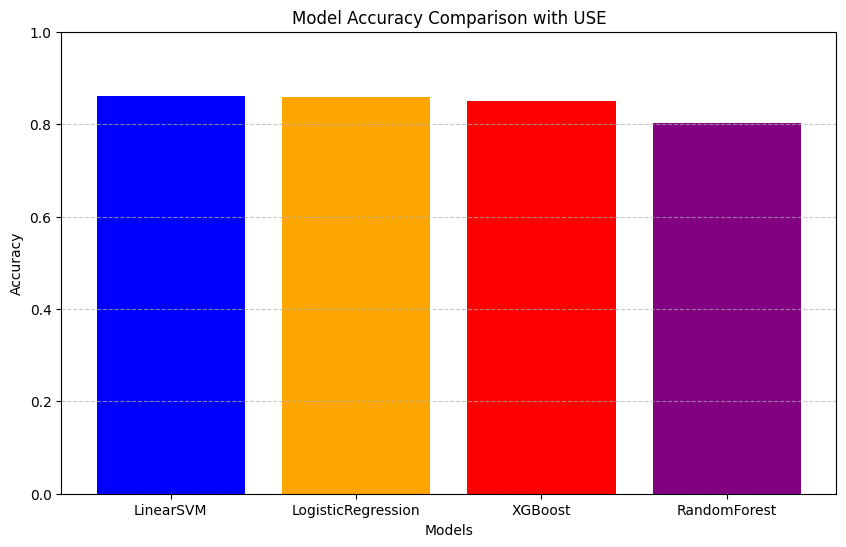

In [64]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'orange', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison with USE")
plt.ylim(0.0, 1.0)  # Set the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 3. TF-IDF + Universal Sentence Encoder (USE)
#### 1. Linear SVM
#### 2. Logistic Regression
#### 3. XGBoost classifier
#### 4. Random Forest classifier

#### Combine TF-IDF and Universal Sentence Encoder embeddings


In [65]:
xtrain_tfidf_use_combined = tf.concat([tfidf_vectorizer_xtrain, xtrain_use], axis=1)
xtest_tfidf_use_combined = tf.concat([tfidf_vectorizer_xtest, xtest_use], axis=1)

#### Fit classifiers

In [66]:
start = timer()
svm_tfidf_use = svm_classifier.fit(xtrain_tfidf_use_combined, ytrain)
print('Required time for training Linear SVM:- ', timer() - start)
start = timer()
lr_tfidf_use = logistic_regression.fit(xtrain_tfidf_use_combined, ytrain)
print('Required time for training Logistic Regression:- ', timer() - start)
start = timer()
xgboost_tfidf_use = xgboost_classifier.fit(xtrain_tfidf_use_combined, ytrain)
print('Required time for training XGBoost classifier:- ', timer() - start)
start = timer()
rfc_tfidf_use = random_forest_classifier.fit(xtrain_tfidf_use_combined, ytrain)
print('Required time for training Random Forest classifier:- ', timer() - start)

Required time for training Linear SVM:-  11.652045900002122
Required time for training Logistic Regression:-  5.4591288000228815
Required time for training XGBoost classifier:-  81.01239940000232
Required time for training Random Forest classifier:-  6.132362800010014


#### Make predictions

### Linear SVM

In [67]:
start = timer()
y_pred_svm_tfidf_use, accuracy_svm_tfidf_use, precision_svm_tfidf_use, recall_svm_tfidf_use, f1_svm_tfidf_use, report_svm_tfidf_use, cm_svm_tfidf_use = evaluate_model(svm_tfidf_use, xtest_tfidf_use_combined, ytest)
print('Required time for Linear SVM prediction with TFIDF+USE :- ', timer() - start)

Required time for Linear SVM prediction with TFIDF+USE :-  0.1795358998933807


#### Print actual vs. predicted results for Linear SVM with TFIDF + USE

In [68]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_svm_tfidf_use[:15]):
    print(f"Actual: {actual}, SVM with TFIDF+USE Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, SVM with TFIDF+USE Predicted: 1

Actual: 1, SVM with TFIDF+USE Predicted: 1

Actual: 1, SVM with TFIDF+USE Predicted: 1

Actual: 1, SVM with TFIDF+USE Predicted: 1

Actual: 0, SVM with TFIDF+USE Predicted: 0

Actual: 1, SVM with TFIDF+USE Predicted: 0

Actual: 1, SVM with TFIDF+USE Predicted: 0

Actual: 1, SVM with TFIDF+USE Predicted: 1

Actual: 0, SVM with TFIDF+USE Predicted: 0

Actual: 0, SVM with TFIDF+USE Predicted: 0

Actual: 0, SVM with TFIDF+USE Predicted: 0

Actual: 0, SVM with TFIDF+USE Predicted: 1

Actual: 0, SVM with TFIDF+USE Predicted: 0

Actual: 1, SVM with TFIDF+USE Predicted: 1

Actual: 0, SVM with TFIDF+USE Predicted: 0



In [69]:
print(f"LinearSVM (TFIDF+USE) Accuracy: {accuracy_svm_tfidf_use:.2f}")
print(f"LinearSVM (TFIDF+USE) Precision: {precision_svm_tfidf_use:.2f}")
print(f"LinearSVM (TFIDF+USE) Recall: {recall_svm_tfidf_use:.2f}")
print(f"LinearSVM (TFIDF+USE) F1 score: {f1_svm_tfidf_use:.2f}")
print("Classification Report:")
print(report_svm_tfidf_use)
print("Confusion Matrix")
print(cm_svm_tfidf_use)

LinearSVM (TFIDF+USE) Accuracy: 0.84
LinearSVM (TFIDF+USE) Precision: 0.85
LinearSVM (TFIDF+USE) Recall: 0.83
LinearSVM (TFIDF+USE) F1 score: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5013
           1       0.85      0.83      0.84      4987

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix
[[4262  751]
 [ 829 4158]]


### Logistic Regression

In [70]:
start = timer()
y_pred_lr_tfidf_use, accuracy_lr_tfidf_use, precision_lr_tfidf_use, recall_lr_tfidf_use, f1_lr_tfidf_use, report_lr_tfidf_use, cm_lr_tfidf_use = evaluate_model(lr_tfidf_use, xtest_tfidf_use_combined, ytest)
print('Required time for Logistic Regression prediction with TFIDF+USE :- ', timer() - start)

Required time for Logistic Regression prediction with TFIDF+USE :-  0.16564859997015446


#### Print actual vs. predicted results for Logistic Regression with TFIDF + USE

In [71]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_lr_tfidf_use[:15]):
    print(f"Actual: {actual}, LR with TFIDF+USE embedding Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, LR with TFIDF+USE embedding Predicted: 1

Actual: 1, LR with TFIDF+USE embedding Predicted: 1

Actual: 1, LR with TFIDF+USE embedding Predicted: 1

Actual: 1, LR with TFIDF+USE embedding Predicted: 1

Actual: 0, LR with TFIDF+USE embedding Predicted: 0

Actual: 1, LR with TFIDF+USE embedding Predicted: 0

Actual: 1, LR with TFIDF+USE embedding Predicted: 0

Actual: 1, LR with TFIDF+USE embedding Predicted: 1

Actual: 0, LR with TFIDF+USE embedding Predicted: 0

Actual: 0, LR with TFIDF+USE embedding Predicted: 0

Actual: 0, LR with TFIDF+USE embedding Predicted: 0

Actual: 0, LR with TFIDF+USE embedding Predicted: 1

Actual: 0, LR with TFIDF+USE embedding Predicted: 0

Actual: 1, LR with TFIDF+USE embedding Predicted: 1

Actual: 0, LR with TFIDF+USE embedding Predicted: 0



In [72]:
print(f"Logistic Regression (TFIDF+USE) Accuracy: {accuracy_lr_tfidf_use:.2f}")
print(f"Logistic Regression (TFIDF+USE) Precision: {precision_lr_tfidf_use:.2f}")
print(f"Logistic Regression (TFIDF+USE) Recall: {recall_lr_tfidf_use:.2f}")
print(f"Logistic Regression (TFIDF+USE) F1 score: {f1_lr_tfidf_use:.2f}")
print("Classification Report:")
print(report_lr_tfidf_use)
print("Confusion Matrix")
print(cm_lr_tfidf_use)

Logistic Regression (TFIDF+USE) Accuracy: 0.86
Logistic Regression (TFIDF+USE) Precision: 0.86
Logistic Regression (TFIDF+USE) Recall: 0.85
Logistic Regression (TFIDF+USE) F1 score: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5013
           1       0.86      0.85      0.86      4987

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Confusion Matrix
[[4324  689]
 [ 743 4244]]


### XGBoost Classifier

In [73]:
start = timer()
y_pred_xgb_tfidf_use, accuracy_xgb_tfidf_use, precision_xgb_tfidf_use, recall_xgb_tfidf_use, f1_xgb_tfidf_use, report_xgb_tfidf_use, cm_xgb_tfidf_use = evaluate_model(xgboost_tfidf_use, xtest_tfidf_use_combined, ytest)
print('Required time for XGBoost prediction with TFIDF+USE :- ', timer() - start)

Required time for XGBoost prediction with TFIDF+USE :-  1.327846399974078


#### Print actual vs. predicted results for XGBoost with TFIDF + USE

In [74]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_xgb_tfidf_use[:15]):
    print(f"Actual: {actual}, XGBoost with TFIDF+USE embedding Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0



In [75]:
print(f"XGBoost (TFIDF+USE) Accuracy: {accuracy_xgb_tfidf_use:.2f}")
print(f"XGBoost (TFIDF+USE) Precision: {precision_xgb_tfidf_use:.2f}")
print(f"XGBoost (TFIDF+USE) Recall: {recall_xgb_tfidf_use:.2f}")
print(f"XGBoost (TFIDF+USE) F1 score: {f1_xgb_tfidf_use:.2f}")
print("Classification Report:")
print(report_xgb_tfidf_use)
print("Confusion Matrix:")
print(cm_xgb_tfidf_use)

XGBoost (TFIDF+USE) Accuracy: 0.84
XGBoost (TFIDF+USE) Precision: 0.84
XGBoost (TFIDF+USE) Recall: 0.84
XGBoost (TFIDF+USE) F1 score: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5013
           1       0.84      0.84      0.84      4987

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:
[[4236  777]
 [ 782 4205]]


### Random Forest classifier

In [76]:
start = timer()
y_pred_rfc_tfidf_use, accuracy_rfc_tfidf_use, precision_rfc_tfidf_use, recall_rfc_tfidf_use, f1_rfc_tfidf_use, report_rfc_tfidf_use, cm_rfc_tfidf_use = evaluate_model(rfc_tfidf_use, xtest_tfidf_use_combined, ytest)
print('Required time for Random Forest prediction with TFIDF+USE :- ', timer() - start)

Required time for Random Forest prediction with TFIDF+USE :-  0.2946507000597194


#### Print actual vs. predicted results for Random Forest with TFIDF + USE

In [77]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_rfc_tfidf_use[:15]):
    print(f"Actual: {actual}, RFC with TFIDF+USE embedding Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 0, RFC with TFIDF+USE embedding Predicted: 0

Actual: 1, RFC with TFIDF+USE embedding Predicted: 1

Actual: 1, RFC with TFIDF+USE embedding Predicted: 1

Actual: 1, RFC with TFIDF+USE embedding Predicted: 1

Actual: 0, RFC with TFIDF+USE embedding Predicted: 0

Actual: 1, RFC with TFIDF+USE embedding Predicted: 0

Actual: 1, RFC with TFIDF+USE embedding Predicted: 1

Actual: 1, RFC with TFIDF+USE embedding Predicted: 1

Actual: 0, RFC with TFIDF+USE embedding Predicted: 0

Actual: 0, RFC with TFIDF+USE embedding Predicted: 0

Actual: 0, RFC with TFIDF+USE embedding Predicted: 0

Actual: 0, RFC with TFIDF+USE embedding Predicted: 1

Actual: 0, RFC with TFIDF+USE embedding Predicted: 0

Actual: 1, RFC with TFIDF+USE embedding Predicted: 1

Actual: 0, RFC with TFIDF+USE embedding Predicted: 0



In [78]:
print(f"Random Forest (TFIDF+USE) Accuracy: {accuracy_rfc_tfidf_use:.2f}")
print(f"Random Forest (TFIDF+USE) Precision: {precision_rfc_tfidf_use:.2f}")
print(f"Random Forest (TFIDF+USE) Recall: {recall_rfc_tfidf_use:.2f}")
print(f"Random Forest (TFIDF+USE) F1 score: {f1_rfc_tfidf_use:.2f}")
print("Classification Report:")
print(report_rfc_tfidf_use)
print("Confusion Matrix:")
print(cm_rfc_tfidf_use)

Random Forest (TFIDF+USE) Accuracy: 0.81
Random Forest (TFIDF+USE) Precision: 0.81
Random Forest (TFIDF+USE) Recall: 0.81
Random Forest (TFIDF+USE) F1 score: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      5013
           1       0.81      0.81      0.81      4987

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

Confusion Matrix:
[[4040  973]
 [ 949 4038]]


### Visualization

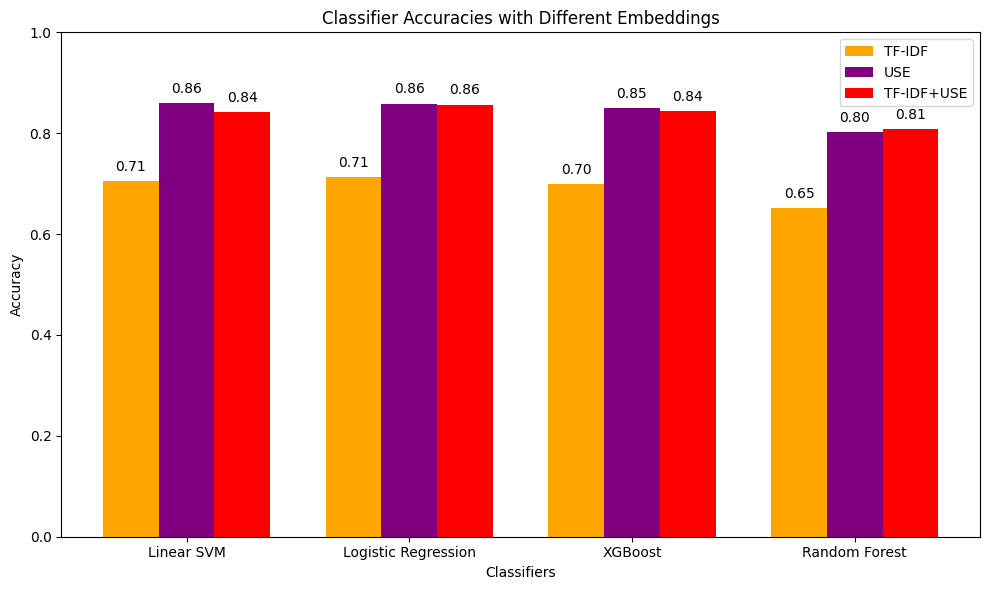

In [79]:
# Define the classifiers and their corresponding accuracies
classifiers = ["Linear SVM", "Logistic Regression", "XGBoost", "Random Forest"]
tfidf_accuracies = [accuracy_svm, accuracy_lr, accuracy_xgboost, accuracy_rfc]  # Replace with actual accuracy values
use_accuracies = [accuracy_svm_use, accuracy_lr_use, accuracy_xgboost_use, accuracy_rfc_use]  # Replace with actual accuracy values
tfidf_use_accuracies = [accuracy_svm_tfidf_use, accuracy_lr_tfidf_use, accuracy_xgb_tfidf_use, accuracy_rfc_tfidf_use]  # Replace with actual accuracy values

# Create an index for the x-axis
x = np.arange(len(classifiers))

# Set the width of the bars
bar_width = 0.25

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, tfidf_accuracies, bar_width, label='TF-IDF', color='orange')
plt.bar(x, use_accuracies, bar_width, label='USE', color='purple')
plt.bar(x + bar_width, tfidf_use_accuracies, bar_width, label='TF-IDF+USE', color='red')

# Set labels, title, and legend
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies with Different Embeddings')
plt.xticks(x, classifiers)
plt.ylim(0, 1.0)
plt.legend()

# Add accuracy values on top of the bars
for i in range(len(classifiers)):
    plt.text(x[i] - bar_width, tfidf_accuracies[i] + 0.02, f"{tfidf_accuracies[i]:.2f}", ha='center')
    plt.text(x[i], use_accuracies[i] + 0.02, f"{use_accuracies[i]:.2f}", ha='center')
    plt.text(x[i] + bar_width, tfidf_use_accuracies[i] + 0.02, f"{tfidf_use_accuracies[i]:.2f}", ha='center')


# Display the plot
plt.tight_layout()
plt.show()


#### Conclusion: If you see above visualization, as compared to TF-IDF embedding, USE as well as TF-IDF+USE embeddings works better for sentiment analysis on IMDB dataset with different classifiers

Reference:
https://github.com/FarhanaTeli/Sentiment_Analysis_IMDB

https://github.com/Wittline/tf-idf